In [1]:
import os
import pandas as pd
import glob
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_dir = 'PlantVillage-Dataset/raw/color'

classes_list = []
for imagePath in os.listdir(base_dir):
	l = imagePath
	classes_list.append(l)

In [3]:
classes_list

['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Soybean___healthy',
 'Cherry_(including_sour)___healthy',
 'Tomato___Septoria_leaf_spot',
 'Corn_(maize)___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Apple___Black_rot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Grape___Black_rot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Squash___Powdery_mildew',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Potato___healthy',
 'Potato___Early_blight',
 'Raspberry___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Potato___Late_blight',
 'Tomato___Late_blight',
 'Apple___Cedar_apple_rust',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Apple___healthy',
 'Grape___Esca_(Black_Measles)',
 'Peach___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___Tomato_mosaic_virus',
 'Peach___Bacterial_spot',
 'Tomato___Target_Spot',
 'Grape___healthy',
 'Tomato___Leaf_Mold',
 'Strawberry

In [4]:
for lists in os.listdir(base_dir):
  path = os.path.join(base_dir, lists)
  for filename in glob.glob(path+'/*'):
    p_l= lists
    img_class= []
    img_class.append(lists)

In [5]:
img_class

['Cherry_(including_sour)___Powdery_mildew']

In [6]:
with open('plantvillage_annotation.csv', 'w', newline='') as file:
  file.write("id;classes;")
  file.write('\n')
  for lists in os.listdir(base_dir):
    path = os.path.join(base_dir, lists)
    for filename in glob.glob(path+'/*'):
      file.write(os.path.basename(filename))
      file.write(';')
      p_l = lists
      img_class=[]
      img_class.append(p_l)
      file.write(str(img_class))
      file.write(';')
      file.write('\n')

In [7]:
img_metadata = pd.read_csv('plantvillage_annotation.csv',sep=';')
img_metadata = img_metadata.drop('Unnamed: 2', axis=1)
img_metadata['id'] = img_metadata['id'].apply(lambda x: 'plants/' + x)
img_metadata['classes'] = img_metadata['classes'].apply(lambda x: eval(x))
img_metadata.head()

id  \
0  plants/279b02e6-6c6e-43eb-abfa-171cd1bded41___...   
1  plants/8dacdf2a-e031-4b21-b191-86e82078ef6d___...   
2  plants/42032c9c-e401-452a-9b77-e19ee8cd7ed5___...   
3  plants/54a17d93-22ce-4478-bb69-5d9320b34ad0___...   
4  plants/ea7391a1-7052-4db6-bbd4-210fb75bd238___...   

                                        classes  
0  [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]  
1  [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]  
2  [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]  
3  [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]  
4  [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]

In [8]:
img_metadata.classes

0        [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]
1        [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]
2        [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]
3        [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]
4        [Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]
                             ...                     
54300      [Cherry_(including_sour)___Powdery_mildew]
54301      [Cherry_(including_sour)___Powdery_mildew]
54302      [Cherry_(including_sour)___Powdery_mildew]
54303      [Cherry_(including_sour)___Powdery_mildew]
54304      [Cherry_(including_sour)___Powdery_mildew]
Name: classes, Length: 54305, dtype: object

In [9]:
all_classes = img_metadata['classes'].apply(pd.Series).stack().tolist()

# Извлекаем уникальные классы с помощью set
unique_classes = set(all_classes)

# Если нужно получить результат в виде списка
unique_classes_list = np.array(list(unique_classes))

print(unique_classes_list)

['Potato___Late_blight' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Strawberry___healthy' 'Cherry_(including_sour)___healthy'
 'Tomato___Target_Spot' 'Corn_(maize)___healthy' 'Tomato___Bacterial_spot'
 'Potato___healthy' 'Orange___Haunglongbing_(Citrus_greening)'
 'Peach___Bacterial_spot' 'Peach___healthy' 'Soybean___healthy'
 'Tomato___Septoria_leaf_spot' 'Tomato___Leaf_Mold' 'Tomato___healthy'
 'Tomato___Late_blight' 'Blueberry___healthy' 'Raspberry___healthy'
 'Corn_(maize)___Common_rust_' 'Squash___Powdery_mildew'
 'Cherry_(including_sour)___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Grape___Black_rot' 'Apple___healthy' 'Potato___Early_blight'
 'Tomato___Early_blight' 'Grape___Esca_(Black_Measles)'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Apple___Cedar_apple_rust'
 'Apple___Apple_scab' 'Grape___healthy'
 'Tomato___Spider_mites Two-spotted_spider_mite'
 'Pepper,_bell___Bacterial_spot' 'Tomato___Tomato_mosaic_virus'
 'Peppe

In [10]:
unique_classes_list.shape

(38,)

In [5]:
!mkdir -p plants
destination_directory = 'plants/'

for lists in tqdm(os.listdir(base_dir)):
    path = os.path.join(base_dir, lists)
    for filename in glob.glob(path+'/*'):
        shutil.copy2(filename, destination_directory)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.25it/s]


Text(0.5, 1.0, "['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']")

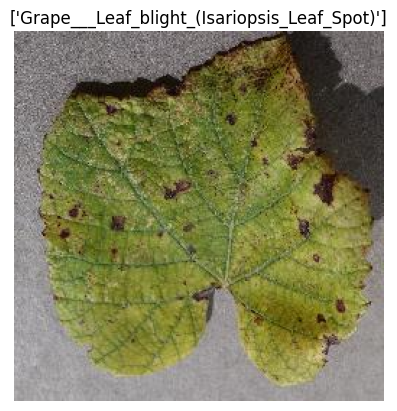

In [11]:
img = plt.imread(img_metadata.id[0])
plt.imshow(img)
plt.axis('off')
plt.title((img_metadata.classes[0]))